In [1]:
# Importing libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for data preprocessing and machine learning models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

school data set

In [2]:
# Step 3.1: Load the dataset
df = pd.read_csv("./data/school_dropout.csv", delimiter=';')

In [3]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


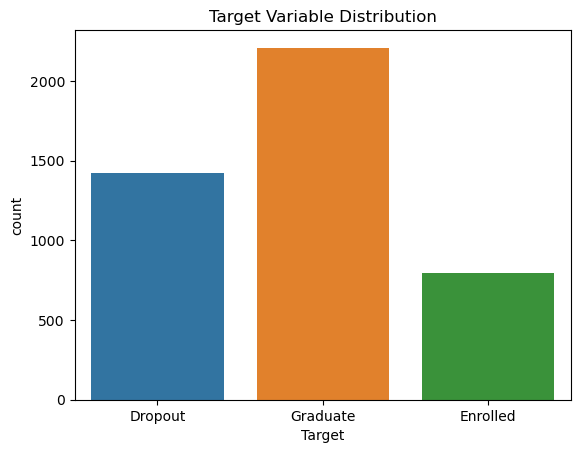

In [4]:
# Step 3.2: Explore the dataset
target_counts = df['Target'].value_counts()
print(target_counts)
sns.countplot(data=df, x='Target')
plt.title('Target Variable Distribution')
plt.show()

In [5]:
# Step 3.3.1: Convert the target variable to binary classification
# Let's create a new target variable where Dropout = 1, and Graduate/Enrolled = 0
df['Target_Binary'] = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

In [6]:
# Step 3.3.2: Balance the dataset using random undersampling
df_majority = df[df['Target_Binary'] == 0]  # Graduate or Enrolled
df_minority = df[df['Target_Binary'] == 1] 
df_majority_downsampled = resample(df_majority, 
                                   replace=False,     # sample without replacement
                                   n_samples=len(df_minority),  # match minority class count
                                   random_state=42) 
df_balanced = pd.concat([df_minority, df_majority_downsampled])
balanced_target_counts = df_balanced['Target_Binary'].value_counts()
balanced_target_counts

Target_Binary
1    1421
0    1421
Name: count, dtype: int64

In [7]:
# Step 3.3.3: Drop the original target variable (we now have 'Target_Binary')
df_balanced.drop(columns=['Target'], inplace=True)
df_balanced.reset_index(drop=True, inplace=True)
df_balanced.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Binary
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.0,0,10.8,1.4,1.74,1
1,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.0,0,10.8,1.4,1.74,1
2,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.0,0,15.5,2.8,-4.06,1
3,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.5,0,8.9,1.4,3.51,1
4,1,1,2,9853,1,1,133.0,1,19,37,...,0,6,0,0,0.0,0,12.7,3.7,-1.70,1


In [8]:
# Step 3.4: Drop irrelevant columns
columns_to_drop = [
    'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t',
    'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification",
    "Mother's occupation", "Father's occupation", "International", "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (without evaluations)", "Unemployment rate", "Inflation rate", "GDP"
]

# Drop the columns that we do not need
df_balanced.drop(columns=columns_to_drop, inplace=True)

In [9]:
df_balanced.head()

,Marital status,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target_Binary
0,1,122.0,127.3,1,0,0,1,1,0,20,...,0,0,0,0.0,0,0,0,0,0.0,1
1,1,122.0,124.8,1,0,0,0,1,0,19,...,6,0,0,0.0,0,6,0,0,0.0,1
2,1,119.0,113.1,1,0,0,0,1,0,22,...,5,5,0,0.0,0,5,5,0,0.0,1
3,1,138.0,123.0,1,0,1,0,0,0,18,...,6,9,5,11.4,0,6,14,2,13.5,1
4,1,133.0,130.2,1,0,0,1,0,0,19,...,6,6,0,0.0,0,6,0,0,0.0,1


In [10]:
# Step 3.5.1: Separate features and target
X = df_balanced.drop(columns=['Target_Binary'])
y = df_balanced['Target_Binary']

In [11]:

def train_and_evaluate_with_partitions(model, param_grid, X, y):
    partitions = [
        (0.2, 0.8),  # 20% train, 80% test
        (0.5, 0.5),  # 50% train, 50% test
        (0.8, 0.2)   # 80% train, 20% test
    ]

    results = []

    for train_size, test_size in partitions:
        # Split data into training and testing sets based on the current partition
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=42, stratify=y)
        
        # Set up GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
        
        # Fit the model with the training set
        grid_search.fit(X_train, y_train)
        
        # Get the best estimator and hyperparameters
        best_model = grid_search.best_estimator_
        
        # Calculate accuracies for train, validation (using cross-validation scores), and test sets
        train_accuracy = best_model.score(X_train, y_train)
        validation_accuracy = grid_search.best_score_  # Best cross-validated score during grid search
        test_accuracy = best_model.score(X_test, y_test)
        
        # Append the results
        results.append({
            'train_size': train_size,
            'best_params': grid_search.best_params_,
            'train_accuracy': train_accuracy,
            'validation_accuracy': validation_accuracy,
            'test_accuracy': test_accuracy
        })

    return results


In [12]:
# Updated parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],                  # Fewer estimators to make each tree less specialized
    'max_depth': [5, 7, 10],                    # Reduced tree depth to prevent memorizing data
    'min_samples_split': [10, 20, 30],          # More samples required to make a split, reducing tree branching
    'min_samples_leaf': [5, 10, 20]             # Require more samples per leaf to avoid very small nodes
}

# Create a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Train and evaluate Random Forest using the function for multiple partitions
results_rf = train_and_evaluate_with_partitions(rf, param_grid_rf, X, y)

# Display the results
for result in results_rf:
    print(f"\nPartition Train Size: {result['train_size'] * 100}%")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Train Accuracy: {result['train_accuracy']:.2f}")
    print(f"Validation Accuracy: {result['validation_accuracy']:.2f}")
    print(f"Test Accuracy: {result['test_accuracy']:.2f}")


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits

Partition Train Size: 20.0%
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 50}
Train Accuracy: 0.86
Validation Accuracy: 0.83
Test Accuracy: 0.84

Partition Train Size: 50.0%
Best Parameters: {'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 100}
Train Accuracy: 0.87
Validation Accuracy: 0.85
Test Accuracy: 0.83

Partition Train Size: 80.0%
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}
Train Accuracy: 0.90
Validation Accuracy: 0.84
Test Accuracy: 0.85


In [13]:

# Example usage for Logistic Regression
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),  # Step to standardize the features
    ('classifier', LogisticRegression(max_iter=2000, random_state=42))  # Increase max_iter for convergence
])

param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10],      # Regularization parameter
    'classifier__solver': ['lbfgs', 'liblinear'],  # Solver type
}

# Train and evaluate Logistic Regression with different partitions
results_lr = train_and_evaluate_with_partitions(pipeline_lr, param_grid_lr, X, y)

# Display the results
for result in results_lr:
    print(f"\nPartition Train Size: {result['train_size'] * 100}%")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Train Accuracy: {result['train_accuracy']:.2f}")
    print(f"Validation Accuracy: {result['validation_accuracy']:.2f}")
    print(f"Test Accuracy: {result['test_accuracy']:.2f}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Partition Train Size: 20.0%
Best Parameters: {'classifier__C': 0.1, 'classifier__solver': 'lbfgs'}
Train Accuracy: 0.85
Validation Accuracy: 0.83
Test Accuracy: 0.84

Partition Train Size: 50.0%
Best Parameters: {'classifier__C': 0.1, 'classifier__solver': 'lbfgs'}
Train Accuracy: 0.86
Validation Accuracy: 0.85
Test Accuracy: 0.84

Partition Train Size: 80.0%
Best Parameters: {'classifier__C': 1, 'classifier__solver': 'lbfgs'}
Train Accuracy: 0.85
Validation Accuracy: 0.85
Test Accuracy: 0.84


In [14]:


X = np.ascontiguousarray(X, dtype=np.float64)  # Ensure features are in the correct format
y = y.astype(int)  # Ensure target variable is integer

# Step 4.13.2: Set up parameter grid for K-Nearest Neighbors (KNN)
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],        # Number of neighbors to use
    'weights': ['uniform', 'distance'], # Weight function used in prediction
    'p': [1, 2]                         # Power parameter for the Minkowski distance (1 for Manhattan, 2 for Euclidean)
}

# Create a K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

# Train and evaluate the KNN using the updated function for multiple partitions
results_knn = train_and_evaluate_with_partitions(knn, param_grid_knn, X, y)

# Display the results for KNN
for result in results_knn:
    print(f"\nPartition Train Size: {result['train_size'] * 100}%")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Train Accuracy: {result['train_accuracy']:.2f}")
    print(f"Validation Accuracy: {result['validation_accuracy']:.2f}")
    print(f"Test Accuracy: {result['test_accuracy']:.2f}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Partition Train Size: 20.0%
Best Parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Train Accuracy: 0.84
Validation Accuracy: 0.77
Test Accuracy: 0.79

Partition Train Size: 50.0%
Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Train Accuracy: 1.00
Validation Accuracy: 0.80
Test Accuracy: 0.79

Partition Train Size: 80.0%
Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Train Accuracy: 1.00
Validation Accuracy: 0.79
Test Accuracy: 0.80


Bank dataset

In [15]:
bank_df = pd.read_csv("./data/bank.csv", delimiter=';')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [16]:
columns_to_drop = ['day', 'month', 'contact', 'pdays', 'job']
bank_df.drop(columns=columns_to_drop, inplace=True)

In [17]:
# Step 4.3: Encode categorical features

# Encode binary features ('default', 'housing', 'loan') as 0 (no) and 1 (yes)
binary_features = ['default', 'housing', 'loan']
for feature in binary_features:
    bank_df[feature] = bank_df[feature].map({'yes': 1, 'no': 0})

# Use one-hot encoding for categorical features ('marital', 'education', 'poutcome')
categorical_features = ['marital', 'education', 'poutcome']
bank_df = pd.get_dummies(bank_df, columns=categorical_features, drop_first=True)

# Step 4.4: Encode the target variable ('y') as 0 (no) and 1 (yes)
bank_df['y'] = bank_df['y'].map({'yes': 1, 'no': 0})

# Display the first few rows to verify encoding
bank_df.head()

,age,default,balance,housing,loan,duration,campaign,previous,y,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,261,1,0,0,True,False,False,True,False,False,False,True
1,44,0,29,1,0,151,1,0,0,False,True,True,False,False,False,False,True
2,33,0,2,1,1,76,1,0,0,True,False,True,False,False,False,False,True
3,47,0,1506,1,0,92,1,0,0,True,False,False,False,True,False,False,True
4,33,0,1,0,0,198,1,0,0,False,True,False,False,True,False,False,True



Target Distribution:
y
0    39922
1     5289
Name: count, dtype: int64


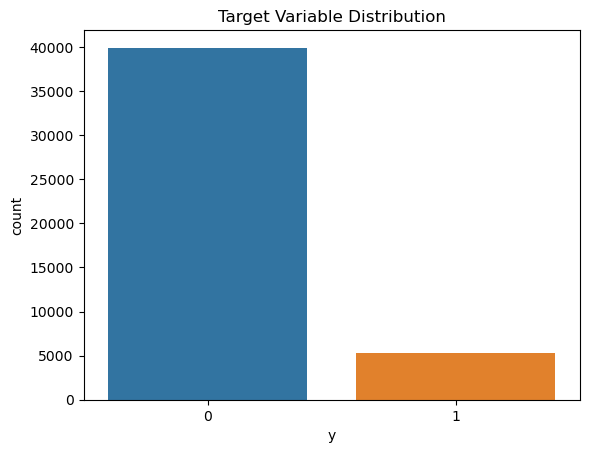

In [18]:
target_counts = bank_df['y'].value_counts()
print("\nTarget Distribution:")
print(target_counts)

# Plot the target distribution to visualize any imbalance
import seaborn as sns
sns.countplot(data=bank_df, x='y')
plt.title('Target Variable Distribution')
plt.show()


Balanced Target Distribution:
y
1    5289
0    5289
Name: count, dtype: int64


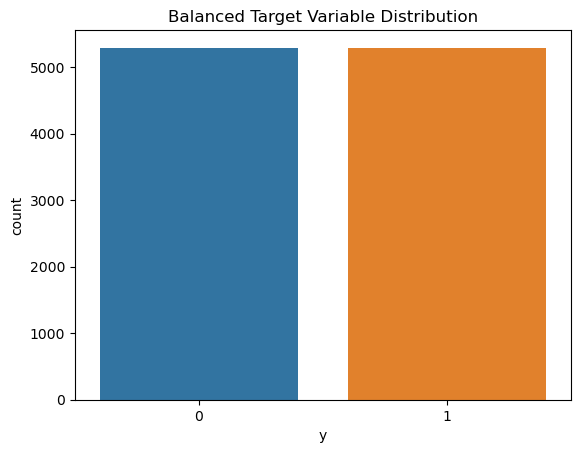

In [19]:
df_majority = bank_df[bank_df['y'] == 0]
df_minority = bank_df[bank_df['y'] == 1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,      # sample without replacement
                                   n_samples=len(df_minority),  # match minority class count
                                   random_state=42)    # reproducible results

# Combine minority class with downsampled majority class
bank_df_balanced = pd.concat([df_minority, df_majority_downsampled])

# Reset index for convenience
bank_df_balanced.reset_index(drop=True, inplace=True)

# Display the new target distribution
balanced_target_counts = bank_df_balanced['y'].value_counts()
print("\nBalanced Target Distribution:")
print(balanced_target_counts)

# Plot the new target distribution to confirm
sns.countplot(data=bank_df_balanced, x='y')
plt.title('Balanced Target Variable Distribution')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = bank_df_balanced.drop(columns=['y'])
y = bank_df_balanced['y']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify the sizes of the split
print(f"Training set size: {X_train.shape[0]} instances")
print(f"Testing set size: {X_test.shape[0]} instances")

Training set size: 8462 instances
Testing set size: 2116 instances


In [21]:
# Step 4.8: Set up parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],   # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split an internal node
}

# Create a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Train and evaluate Random Forest using the function for multiple partitions
results_rf = train_and_evaluate_with_partitions(rf, param_grid_rf, X, y)

# Display the results
for result in results_rf:
    print(f"\nPartition Train Size: {result['train_size'] * 100}%")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Train Accuracy: {result['train_accuracy']:.2f}")
    print(f"Validation Accuracy: {result['validation_accuracy']:.2f}")
    print(f"Test Accuracy: {result['test_accuracy']:.2f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Partition Train Size: 20.0%
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}
Train Accuracy: 0.91
Validation Accuracy: 0.81
Test Accuracy: 0.81

Partition Train Size: 50.0%
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}
Train Accuracy: 0.87
Validation Accuracy: 0.82
Test Accuracy: 0.82

Partition Train Size: 80.0%
Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Train Accuracy: 0.85
Validation Accuracy: 0.81
Test Accuracy: 0.82


In [22]:

# Example usage for Logistic Regression
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),  # Step to standardize the features
    ('classifier', LogisticRegression(max_iter=2000, random_state=42))  # Increase max_iter for convergence
])

param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10],      # Regularization parameter
    'classifier__solver': ['lbfgs', 'liblinear'],  # Solver type
}

# Train and evaluate Logistic Regression with different partitions
results_lr = train_and_evaluate_with_partitions(pipeline_lr, param_grid_lr, X, y)

# Display the results
for result in results_lr:
    print(f"\nPartition Train Size: {result['train_size'] * 100}%")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Train Accuracy: {result['train_accuracy']:.2f}")
    print(f"Validation Accuracy: {result['validation_accuracy']:.2f}")
    print(f"Test Accuracy: {result['test_accuracy']:.2f}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Partition Train Size: 20.0%
Best Parameters: {'classifier__C': 0.1, 'classifier__solver': 'lbfgs'}
Train Accuracy: 0.80
Validation Accuracy: 0.79
Test Accuracy: 0.80

Partition Train Size: 50.0%
Best Parameters: {'classifier__C': 10, 'classifier__solver': 'lbfgs'}
Train Accuracy: 0.80
Validation Accuracy: 0.80
Test Accuracy: 0.80

Partition Train Size: 80.0%
Best Parameters: {'classifier__C': 10, 'classifier__solver': 'lbfgs'}
Train Accuracy: 0.80
Validation Accuracy: 0.80
Test Accuracy: 0.81


In [23]:


X = np.ascontiguousarray(X, dtype=np.float64)  # Ensure features are in the correct format
y = y.astype(int)  # Ensure target variable is integer

# Step 4.13.2: Set up parameter grid for K-Nearest Neighbors (KNN)
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],        # Number of neighbors to use
    'weights': ['uniform', 'distance'], # Weight function used in prediction
    'p': [1, 2]                         # Power parameter for the Minkowski distance (1 for Manhattan, 2 for Euclidean)
}

# Create a K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

# Train and evaluate the KNN using the updated function for multiple partitions
results_knn = train_and_evaluate_with_partitions(knn, param_grid_knn, X, y)

# Display the results for KNN
for result in results_knn:
    print(f"\nPartition Train Size: {result['train_size'] * 100}%")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Train Accuracy: {result['train_accuracy']:.2f}")
    print(f"Validation Accuracy: {result['validation_accuracy']:.2f}")
    print(f"Test Accuracy: {result['test_accuracy']:.2f}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Partition Train Size: 20.0%
Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Train Accuracy: 0.77
Validation Accuracy: 0.71
Test Accuracy: 0.71

Partition Train Size: 50.0%
Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Train Accuracy: 0.77
Validation Accuracy: 0.72
Test Accuracy: 0.73

Partition Train Size: 80.0%
Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Train Accuracy: 1.00
Validation Accuracy: 0.72
Test Accuracy: 0.73


income data

In [24]:
# Step 5.1: Load the census income dataset
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 
    'marital-status', 'occupation', 'relationship', 'race', 'sex', 
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

census_df = pd.read_csv("./data/income.data", header=0, names=column_names, skipinitialspace=True)
census_df


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [25]:
columns_to_drop = ['fnlwgt', 'education']

# Drop the columns
census_df.drop(columns=columns_to_drop, inplace=True)

In [26]:
categorical_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
census_df = pd.get_dummies(census_df, columns=categorical_features, drop_first=True)

# Step 5.4.2: Encode the target variable ('income') as 0 (<=50K) and 1 (>50K)
census_df['income'] = census_df['income'].map({'<=50K': 0, '>50K': 1})

# Display the first few rows to verify encoding
census_df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,50,13,0,0,13,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,9,0,0,40,0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,53,7,0,0,40,0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,28,13,0,0,40,0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,37,14,0,0,40,0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False



Target Distribution:
income
0    24719
1     7841
Name: count, dtype: int64


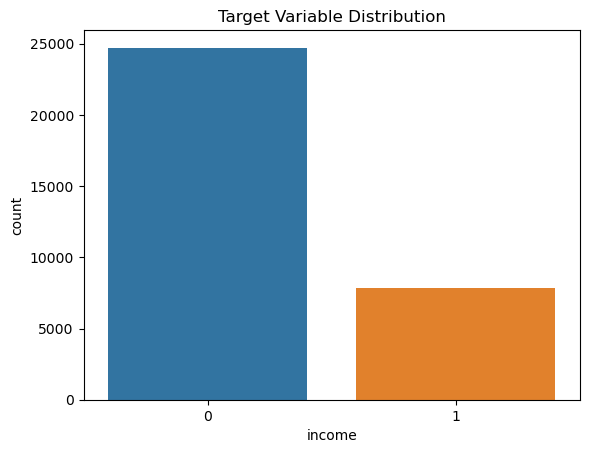

In [27]:
# Step 5.5: Check the balance of the target variable
target_counts = census_df['income'].value_counts()
print("\nTarget Distribution:")
print(target_counts)

# Plot the target distribution to visualize any imbalance
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=census_df, x='income')
plt.title('Target Variable Distribution')
plt.show()



Balanced Target Distribution:
income
1    7841
0    7841
Name: count, dtype: int64


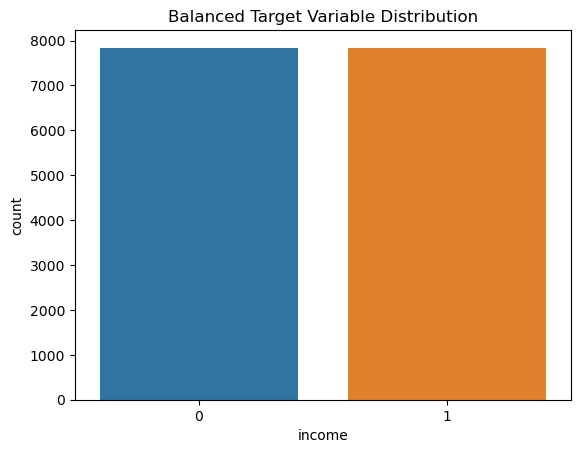

In [28]:
# Step 5.6: Balance the dataset using random undersampling
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = census_df[census_df['income'] == 0]
df_minority = census_df[census_df['income'] == 1]

# Downsample majority class to match the number of minority class instances
df_majority_downsampled = resample(df_majority, 
                                   replace=False,      # sample without replacement
                                   n_samples=len(df_minority),  # match minority class count
                                   random_state=42)    # reproducible results

# Combine minority class with downsampled majority class
census_df_balanced = pd.concat([df_minority, df_majority_downsampled])

# Reset index for convenience
census_df_balanced.reset_index(drop=True, inplace=True)

# Display the new target distribution
balanced_target_counts = census_df_balanced['income'].value_counts()
print("\nBalanced Target Distribution:")
print(balanced_target_counts)

# Plot the new target distribution to confirm
sns.countplot(data=census_df_balanced, x='income')
plt.title('Balanced Target Variable Distribution')
plt.show()


In [29]:
# Step 5.7.1: Separate features and target variable
X = census_df_balanced.drop(columns=['income'])
y = census_df_balanced['income']


In [30]:
# Step 5.8: Set up parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],   # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split an internal node
}

# Create a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Train and evaluate the Random Forest using the function for multiple partitions
results_rf = train_and_evaluate_with_partitions(rf, param_grid_rf, X, y)

# Display the results
for result in results_rf:
    print(f"\nPartition Train Size: {result['train_size'] * 100}%")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Train Accuracy: {result['train_accuracy']:.2f}")
    print(f"Validation Accuracy: {result['validation_accuracy']:.2f}")
    print(f"Test Accuracy: {result['test_accuracy']:.2f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=30, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=30, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=30, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=20, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=20, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=7, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=7, min

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=30, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=30, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=20, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=20, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=7, min_sam

[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=20, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=30, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=30, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=20, min_samples_split=10, n_estimators=50; total time

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=30, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=30, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=30, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=30, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_sam

[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=30, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=30, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=30, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=30, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=20, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=20, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=20, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=20, min_samples_split=20, n_estimators=50; total tim

[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=30, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=20, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=20, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=20, min_samples_split=20, n_estimators=50; total tim

[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=30, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=20, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=20, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=20, min_samples_split=20, n_estimators=50; total tim

[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.5s
Partition Train Size: 20.0%
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Train Accuracy: 0.96
Validation Accuracy: 0.82
Test Accuracy: 0.82

Partition Train Size: 50.0%
Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 150}
Train Accuracy: 0.89
Validation Accuracy: 0.82
Test Accuracy: 0.83

Partition Train Size: 80.0%
Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Train Accuracy: 0.88
Validation Accuracy: 0.83
Test Accuracy: 0.83


In [31]:
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('classifier', LogisticRegression(max_iter=2000, random_state=42))  # Increase max_iter to ensure convergence
])

# Set up parameter grid for Logistic Regression
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10],      # Regularization parameter
    'classifier__solver': ['lbfgs', 'liblinear']  # Solver type
}

# Train and evaluate Logistic Regression with multiple partitions
results_lr = train_and_evaluate_with_partitions(pipeline_lr, param_grid_lr, X, y)

# Display the results for Logistic Regression
for result in results_lr:
    print(f"\nPartition Train Size: {result['train_size'] * 100}%")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Train Accuracy: {result['train_accuracy']:.2f}")
    print(f"Validation Accuracy: {result['validation_accuracy']:.2f}")
    print(f"Test Accuracy: {result['test_accuracy']:.2f}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=30, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=20, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=30, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=30, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=20, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_sam

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Partition Train Size: 20.0%
Best Parameters: {'classifier__C': 0.1, 'classifier__solver': 'lbfgs'}
Train Accuracy: 0.82
Validation Accuracy: 0.81
Test Accuracy: 0.81

Partition Train Size: 50.0%
Best Parameters: {'classifier__C': 1, 'classifier__solver': 'lbfgs'}
Train Accuracy: 0.82
Validation Accuracy: 0.82
Test Accuracy: 0.82

Partition Train Size: 80.0%
Best Parameters: {'classifier__C': 10, 'classifier__solver': 'liblinear'}
Train Accuracy: 0.82
Validation Accuracy: 0.82
Test Accuracy: 0.81


In [32]:


X = np.ascontiguousarray(X, dtype=np.float64)  # Ensure features are in the correct format
y = y.astype(int)  # Ensure target variable is integer

# Step 4.13.2: Set up parameter grid for K-Nearest Neighbors (KNN)
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],        # Number of neighbors to use
    'weights': ['uniform', 'distance'], # Weight function used in prediction
    'p': [1, 2]                         # Power parameter for the Minkowski distance (1 for Manhattan, 2 for Euclidean)
}

# Create a K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

# Train and evaluate the KNN using the updated function for multiple partitions
results_knn = train_and_evaluate_with_partitions(knn, param_grid_knn, X, y)

# Display the results for KNN
for result in results_knn:
    print(f"\nPartition Train Size: {result['train_size'] * 100}%")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Train Accuracy: {result['train_accuracy']:.2f}")
    print(f"Validation Accuracy: {result['validation_accuracy']:.2f}")
    print(f"Test Accuracy: {result['test_accuracy']:.2f}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Partition Train Size: 20.0%
Best Parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Train Accuracy: 0.85
Validation Accuracy: 0.80
Test Accuracy: 0.79

Partition Train Size: 50.0%
Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Train Accuracy: 0.84
Validation Accuracy: 0.80
Test Accuracy: 0.80

Partition Train Size: 80.0%
Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Train Accuracy: 0.85
Validation Accuracy: 0.81
Test Accuracy: 0.81

[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_split=5, n_estimators=150; total time=   1.1s

[CV] END max_depth=10, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END max_depth=10, min_samples_split=5, n_estimators=150; total time=   0.3s
[CV] END .max_depth=20, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END .max_depth=20, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END .max_depth=20, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_split=5, n_estimators=150; total time=   0.3s
[CV] END max_depth=20, min_samples_split=5, n_estimators=150; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END max_depth=None, min_samples_split=5, n_estimators=150; total time=   0.7s
[CV] END max_depth=None, min_samples_split=10, n_estimators=150; total time=   0.6s
[CV] END max_depth=

[CV] END max_depth=10, min_samples_split=2, n_estimators=150; total time=   0.8s
[CV] END max_depth=10, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END max_depth=10, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END .max_depth=20, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END .max_depth=20, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=20, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END .max_depth=20, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=20, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END max_depth=20, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END max_depth=20, min_samples_split=10, n_estimators=150; total time=   0.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=None

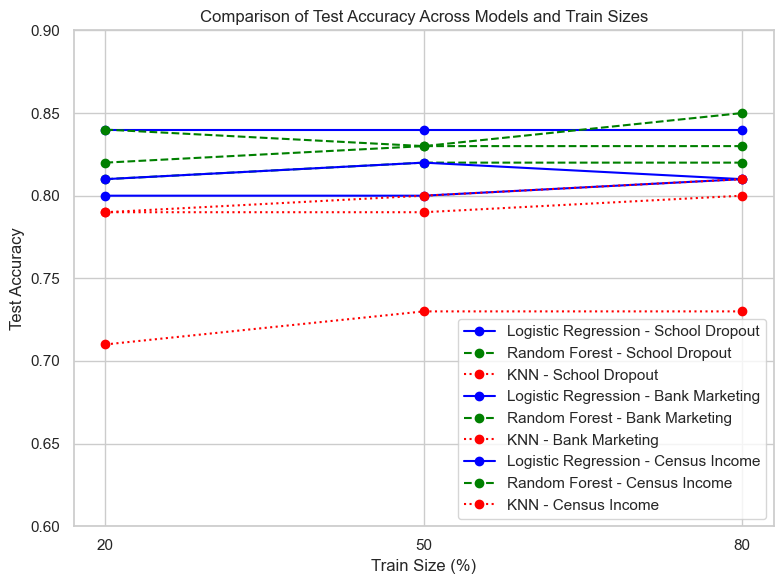

In [40]:
import matplotlib.pyplot as plt

# Data
datasets = ['School Dropout', 'Bank Marketing', 'Census Income']
train_sizes = [20, 50, 80]

# Test accuracies for each model across different datasets and train sizes
logreg_acc = {
    'School Dropout': [0.84, 0.84, 0.84],
    'Bank Marketing': [0.80, 0.80, 0.81],
    'Census Income': [0.81, 0.82, 0.81]
}

rf_acc = {
    'School Dropout': [0.84, 0.83, 0.85],
    'Bank Marketing': [0.81, 0.82, 0.82],
    'Census Income': [0.82, 0.83, 0.83]
}

knn_acc = {
    'School Dropout': [0.79, 0.79, 0.80],
    'Bank Marketing': [0.71, 0.73, 0.73],
    'Census Income': [0.79, 0.80, 0.81]
}

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

colors = {'Logistic Regression': 'blue', 'Random Forest': 'green', 'KNN': 'red'}

for dataset in datasets:
    ax.plot(train_sizes, logreg_acc[dataset], label=f'Logistic Regression - {dataset}', color=colors['Logistic Regression'], linestyle='-', marker='o')
    ax.plot(train_sizes, rf_acc[dataset], label=f'Random Forest - {dataset}', color=colors['Random Forest'], linestyle='--', marker='o')
    ax.plot(train_sizes, knn_acc[dataset], label=f'KNN - {dataset}', color=colors['KNN'], linestyle=':', marker='o')

# Labels and title
ax.set_xlabel('Train Size (%)')
ax.set_ylabel('Test Accuracy')
ax.set_title('Comparison of Test Accuracy Across Models and Train Sizes')
ax.set_xticks(train_sizes)
ax.set_ylim([0.6, 0.9])
ax.grid(True)

# Legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='lower right')

# Show plot
plt.savefig("plt1.png")

plt.tight_layout()
plt.show()


In [37]:

df 

,Classifier,Dataset,Partition,Accuracy
0,Random Forest,School Dropout,20/80,0.84
1,Random Forest,School Dropout,50/50,0.83
2,Random Forest,School Dropout,80/20,0.84
3,Logistic Regression,Bank Marketing,20/80,0.80
4,Logistic Regression,Bank Marketing,50/50,0.80
5,Logistic Regression,Bank Marketing,80/20,0.81
6,KNN,Census Income,20/80,0.79
7,KNN,Census Income,50/50,0.80
8,KNN,Census Income,80/20,0.81


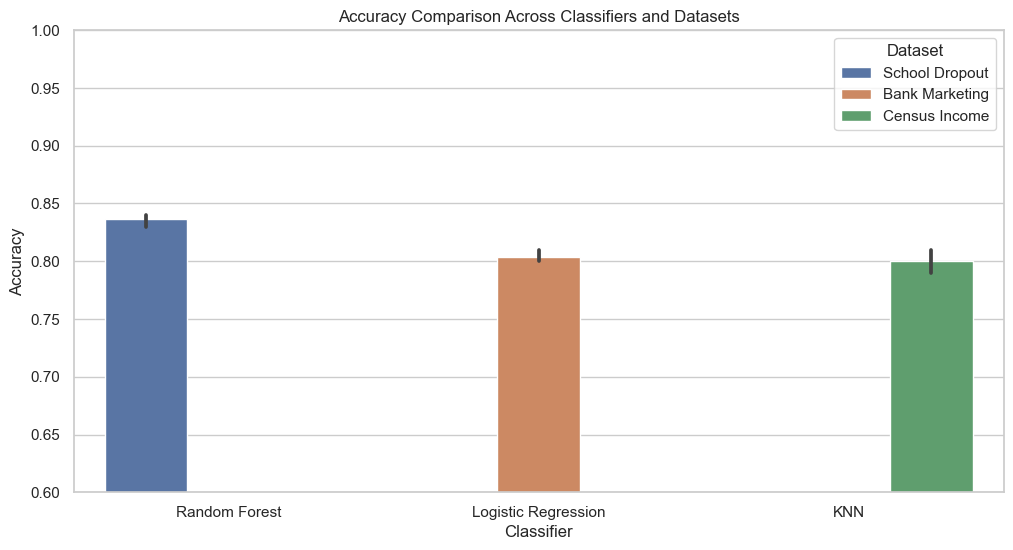

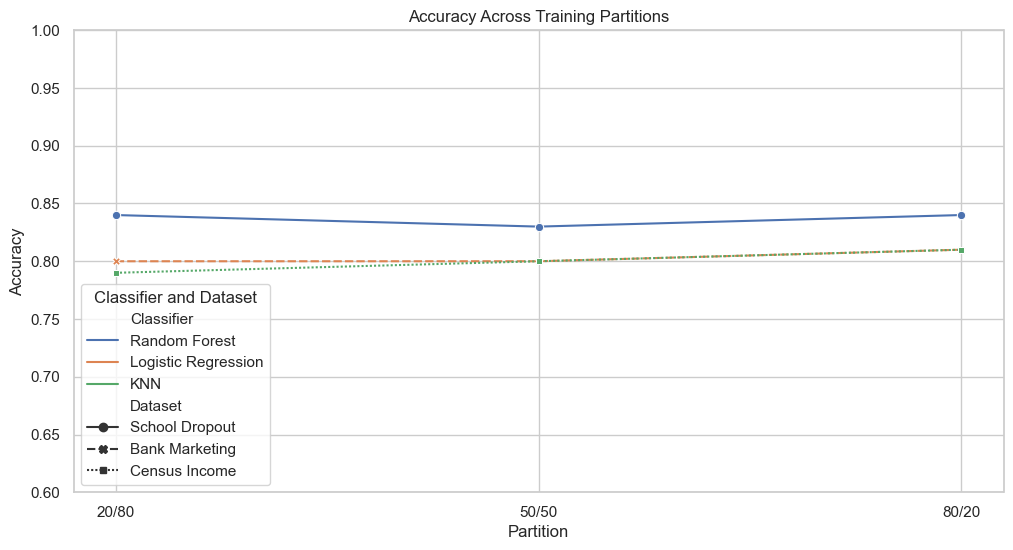

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for consistency
sns.set(style="whitegrid")

# Bar Chart for Accuracy Comparison Across Models and Datasets
plt.figure(figsize=(12, 6))
sns.barplot(x='Classifier', y='Accuracy', hue='Dataset', data=df)
plt.title('Accuracy Comparison Across Classifiers and Datasets')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.ylim(0.6, 1.0)  # Set y-axis limit to make it easier to see differences
plt.legend(title='Dataset')
plt.show()

# Line Plot for Accuracy Across Partitions
plt.figure(figsize=(12, 6))
sns.lineplot(x='Partition', y='Accuracy', hue='Classifier', style='Dataset', markers=True, data=df)
plt.title('Accuracy Across Training Partitions')
plt.ylabel('Accuracy')
plt.xlabel('Partition')
plt.ylim(0.6, 1.0)  # Set y-axis limit to ensure all lines are comparable
plt.legend(title='Classifier and Dataset')
plt.show()
